In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('telco_costomer_churn.csv')
df  = df.drop('customerID', axis=1)

# df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# df.head()

In [2]:
label_encoder = LabelEncoder()


In [3]:
import matplotlib.pyplot as plt
import seaborn  as sns
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = label_encoder.fit_transform(df['TotalCharges'])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74,2660,1


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.dropna

<bound method DataFrame.dropna of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0      

In [6]:
import numpy as np
df.replace('-', np.nan, inplace=True)

In [7]:
# df = df.select_dtypes(include='number')
# df


In [8]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print("IQR= ", IQR)

lowerBound = q1 - 1.5 * IQR
upperBound = q3 + 1.5 * IQR
df = df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

print("DataFrame after removing outliers:", df)

IQR=  gender                 1.00
SeniorCitizen          0.00
Partner                1.00
Dependents             1.00
tenure                46.25
PhoneService           0.00
MultipleLines          2.00
InternetService        1.00
OnlineSecurity         2.00
OnlineBackup           2.00
DeviceProtection       2.00
TechSupport            2.00
StreamingTV            2.00
StreamingMovies        2.00
Contract               1.00
PaperlessBilling       1.00
PaymentMethod          1.00
MonthlyCharges        54.00
TotalCharges        3291.50
Churn                  1.00
dtype: float64
DataFrame after removing outliers:       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
4          0              0        0           0       2             1   
5          0              0        0           0       8             1   
6          1  

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

df['Churn'] = df['Churn'].astype(int)

X = df.drop('Churn', axis=1)
# X = df[['tenure', 'TotalCharges']]
y= df['Churn']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)
# print(y_test)
# print(X_train)
print(y_train)




1839    0
3973    0
3609    1
226     0
4988    0
       ..
789     0
968     0
1667    0
3321    0
1688    0
Name: Churn, Length: 4240, dtype: int32


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# y_pred = model.predict(X_test)

# print(y_pred)

In [14]:
# y_pred = model.predict(X_test)

# print(y_pred)

y_pred = model.predict(X_test) 

y_pred_class = (y_pred >= 0.5).astype(int)  
print(y_pred_class) 

[0 0 0 ... 0 0 0]


In [15]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, y_pred_class)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.18473138548539114


In [16]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_class)
print("R-squared value of the linear regression model on the test set: ", r2)


R-squared value of the linear regression model on the test set:  0.004042145593869617


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

print("Accuracy of the model:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy of the model: 0.8152686145146089
Confusion Matrix:
[[754  46]
 [150 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       800
           1       0.71      0.43      0.53       261

    accuracy                           0.82      1061
   macro avg       0.77      0.68      0.71      1061
weighted avg       0.80      0.82      0.80      1061



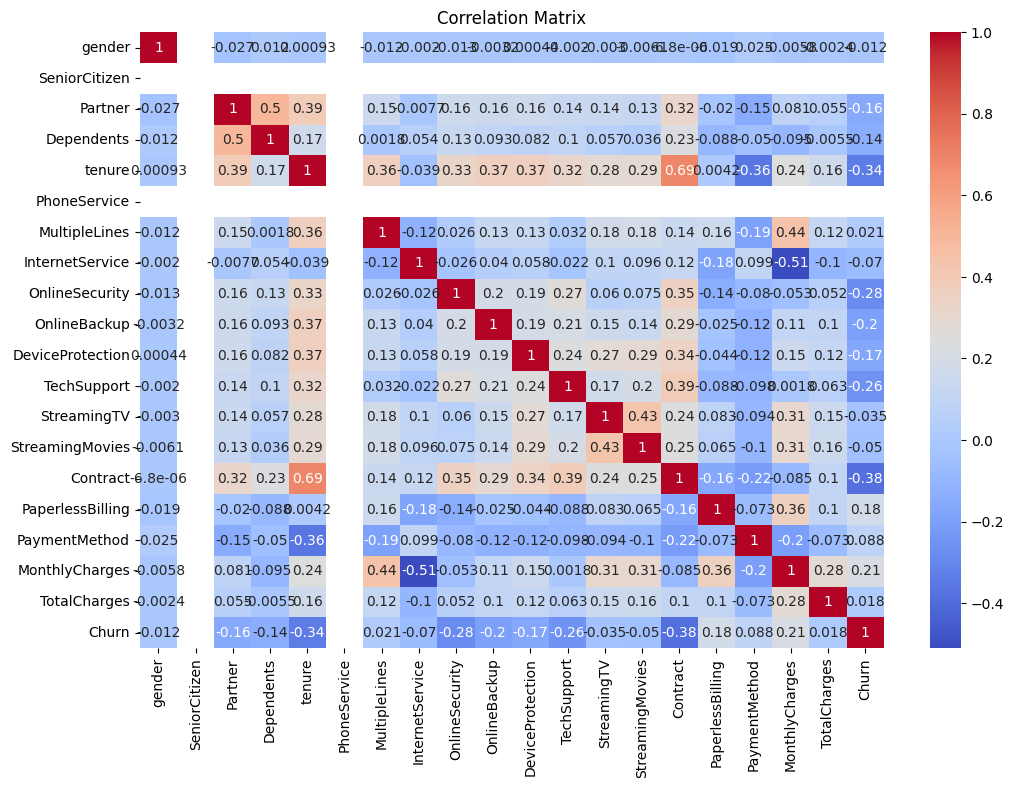

In [18]:
# print(df.corr())
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



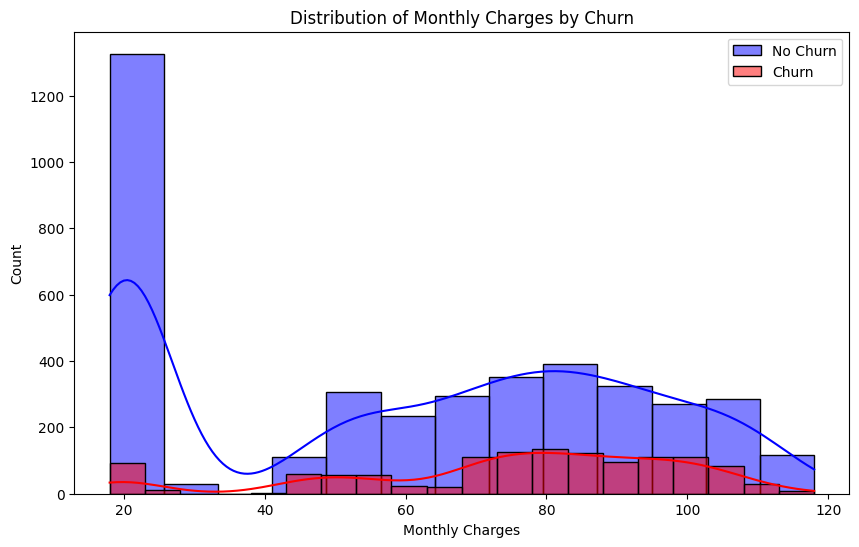

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == 0]['MonthlyCharges'], color='blue', label='No Churn', kde=True)
sns.histplot(df[df['Churn'] == 1]['MonthlyCharges'], color='red', label='Churn', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.legend()
plt.show()



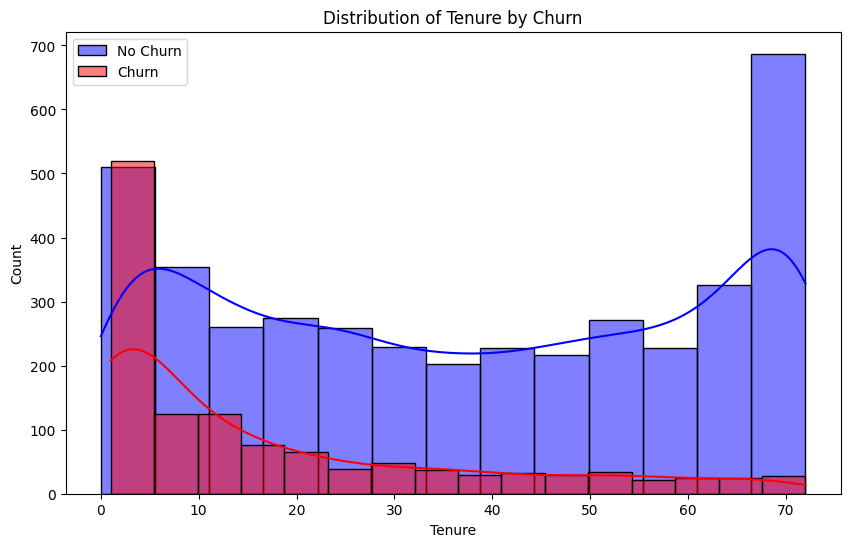

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == 0]['tenure'], color='blue', label='No Churn', kde=True)
sns.histplot(df[df['Churn'] == 1]['tenure'], color='red', label='Churn', kde=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.legend()
plt.show()



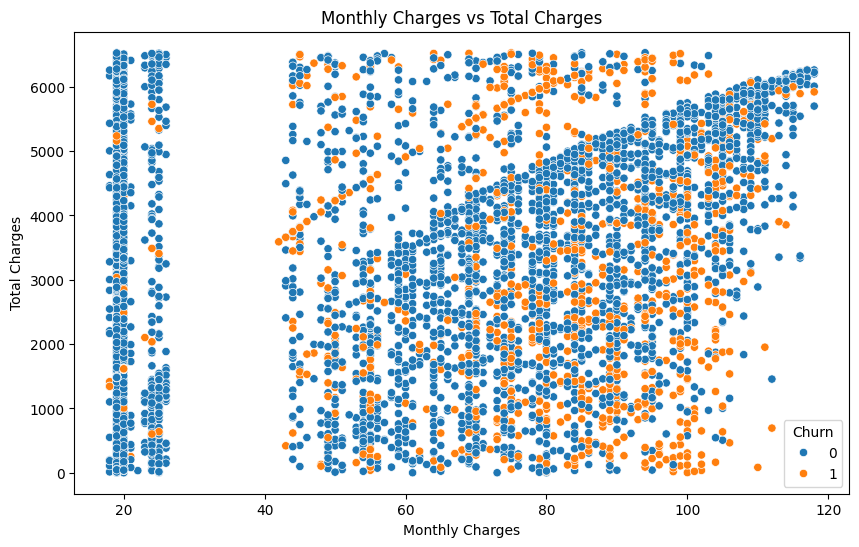

In [21]:
# Scatter plot of 'MonthlyCharges' vs 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()